<a href="https://colab.research.google.com/github/alfinur063/Analis-Big-Data/blob/main/EDA_on_youtube_channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Introduction**

**Data Set Description 💽**
This dataset is curated by the KultureHire interns and has over 900 records with 24 columns. The columns are

1. 'Video Link' - The URL address of the YouTube video
2. 'Video Views' - The number of views the video got
3. 'Video Title' - The title of the video
4. 'Channel URL' - The URL address of the YouTube channel
5. 'Creator Name' - The name of the Content Creater
6. 'Creator Gender' - The gender of the Content Creater
7. 'Total Channel Subcribers' - Total Number of Channel Subcribers
8. 'Total Chanel Views' - Total Number Views of all videos of the channel
9. 'Duration of Video' - Time duration of the video in (HH:MM:SS) format
10. 'Duration in Seconds' - Duration of the video in seconds
11. 'Date of Video Upload' - Date on which video is uploaded in (YYYY-MM-DD) format
12. 'No of Likes' - Number of likes the particular video got
13. 'Language of the Video' - Which language was the content in
14. 'Subtitle' - Whether the video has subtitle is provided or not (YES/NO)
15. 'Video Description' - Whether the video has description provided or not (YES/NO)
16. 'Hashtags' - How many hashtags does the video used in description
17. 'No of Comments' - Number of comments on that video
18. 'Date of the Last Comment' - Date on which the last comment was made in (YYYY-MM-DD) format
19. 'Maximum Quality of the Video' - Maximum Quality of the uploaded video in pixels
20. 'No of Videos the Channel' - Number of videos the channel has published
21. 'No of Playlist' - Number of playlists made by the channel
22. 'Premiered or Not' - Whether the particular video is premiered or not(YES/NO)
23. 'Community Engagement (Posts per week)' - How many posts does the channel posts in the Community Section
24. 'Intern who Collected the Data' - Name of the intern who collected the corresponding record





**Importing the required libraries**

In [108]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime 

In [109]:
#To display all the columns
pd.options.display.max_columns = None 

In [110]:
#Reading the excel file 
youtube = pd.read_csv('/content/drive/MyDrive/Dataset/Youtube Influencer Analysis - Updated.csv', encoding = 'latin')

In [111]:
youtube

,Video Link,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,No of Likes,Language of the Video,Subtitle,Video Description,Hashtags,No of Comments,Date of the Last Comment,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Premiered or Not,Community Engagement (Posts per week),Intern Who Collected the Data
0,https://www.youtube.com/watch?v=_0fUOJ55gis,"146,059",Samse - Didupe Off-road Royal Enfield Himalayan,https://www.youtube.com/c/sriharick,srihari ck,Male,40200,7964284,00:30:41,"1,841.00",7/29/2022,6700.0,Kannada,No,Yes,0,419,8/6/2022,1080,462,12.0,No,1,Akhil Teja
1,https://www.youtube.com/watch?v=_70MSLPRfZI,"231,969",Bhoom Baddhal Web Series,https://www.youtube.com/c/ChaibisketTelugu,Chai Bisket,Male,920000,137535681,00:14:24,864.00,5/22/2022,7800.0,Telugu,No,Yes,1,189,6/15/2022,1080,251,12.0,Yes,2,Akhil Teja
2,https://www.youtube.com/watch?v=_8gfCdt3H00&t=87s,878,"Customer Psychology, Four Views Of Consumer De...",https://www.youtube.com/channel/UCcIUnCsBfONvb...,Virda Warsi,Female,458,72945,0:08:12,492.00,2/9/2021,858.0,Hindi,No,Yes,0,0,NaN,720,158,0.0,No,0,Syed safdar
3,https://www.youtube.com/watch?v=_CkFNJgKsFs,"9,965",Top countries with proven natural gas reserves,https://www.youtube.com/c/trtworld,TRT,NaN,1680000,541653219,0:01:06,66.00,9/13/2022,188.0,English,No,Yes,0,77,9/22/2022,1080,46509,48.0,No,20,Syed safdar
4,https://www.youtube.com/watch?v=_GFkHA5EZdE,"39,780,561",73 Questions With Selena Gomez,Vogue - YouTube,Vogue,NaN,12100000,3600496171,0:07:40,460.00,3/21/2017,901000.0,English,yes,Yes,0,28221,9/23/2022,1080,2872,113.0,No,1,Rahul Singh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,https://www.youtube.com/watch?v=GS18WawA-t0,"6,892",Calming mashup of Islamic Nasheed 2022 | Isami...,https://www.youtube.com/c/SahilOnlineTVnews,Sahil Online TV News,NaN,594000,129926690,00:13:47,827.00,9/29/2022,235.0,Urdu + Arabic,No,Yes,0,15,10/4/2022,1080,5024,36.0,No,1,Mafaz Ali
901,https://www.youtube.com/watch?v=_tc_APkjH2Q,"16,554",Amchi Nawayat Mehfil hee,https://www.youtube.com/sahilonline,Sahil Online TV News,NaN,594000,129926690,00:06:44,404.00,8/6/2017,117.0,Nawayathi,No,Yes,2,0,10/4/2022,720,5024,36.0,No,1,Mafaz Ali
902,https://www.youtube.com/watch?v=Xfj4osSYfhU,"32,798",Aas ge Kaagaz,https://www.youtube.com/sahilonline,Sahil Online Bhatkal,NaN,23500,5104872,00:06:24,384.00,1/3/2021,1.0,Nawayathi,No,Yes,3,0,8/4/2022,720,1018,13.0,No,1,Mafaz Ali
903,https://www.youtube.com/watch?v=mGEHqwVz0eI,"1,503",Anjuman Tarana by ABHS Students | Anjuman Anju...,https://www.youtube.com/sahilonline,Sahil Online Bhatkal,NaN,23500,5104872,00:04:39,279.00,3/6/2022,1.0,Urdu,No,Yes,3,0,8/4/2022,1080,1018,13.0,No,1,Mafaz Ali


**Preprocessing Data**

Memeriksa isi data dan nama kolomnya serta tipe datanya. Kami akan memeriksa apakah ada nilai nol, baris duplikat, dan nilai yang hilang, serta hubungkan nilai tersebut dan ubah tipe data kolom sesuai kebutuhan.

In [112]:
print(youtube.shape) #Shape of the dataset

(905, 24)


In [113]:
youtube.columns

Index(['Video Link', 'Video Views', 'Video Title', 'Channel URL',
       'Creator Name', 'Creator Gender', 'Total Channel Subcribers',
       'Total Chanel Views', 'Duration of Video', 'Duration in Seconds',
       'Date of Video Upload', 'No of Likes', 'Language of the Video',
       'Subtitle', 'Video Description', 'Hashtags', 'No of Comments',
       'Date of the Last Comment', 'Maximum Quality of the Video',
       'No of Videos the Channel', 'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)',
       'Intern Who Collected the Data'],
      dtype='object')

In [114]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Video Link                             905 non-null    object 
 1   Video Views                            905 non-null    object 
 2   Video Title                            905 non-null    object 
 3   Channel URL                            905 non-null    object 
 4   Creator Name                           894 non-null    object 
 5   Creator Gender                         591 non-null    object 
 6   Total Channel Subcribers               905 non-null    object 
 7   Total Chanel Views                     905 non-null    object 
 8   Duration of Video                      905 non-null    object 
 9   Duration in Seconds                    905 non-null    object 
 10  Date of Video Upload                   905 non-null    object 
 11  No of 

In [115]:
youtube.describe()

,No of Likes,Hashtags,Maximum Quality of the Video,No of Videos the Channel,No of Playlist,Community Engagement (Posts per week)
count,9.040000e+02,905.000000,905.000000,905.000000,896.000000,905.000000
mean,5.840101e+05,1.030939,1227.712707,4962.866298,82.246652,4.516022
std,2.959309e+06,1.835350,419.254719,24193.140397,446.041267,19.377195
min,0.000000e+00,0.000000,240.000000,1.000000,0.000000,0.000000
25%,5.475000e+03,0.000000,1080.000000,150.000000,6.000000,0.000000
50%,3.250000e+04,0.000000,1080.000000,389.000000,16.000000,1.000000
75%,1.845000e+05,2.000000,1080.000000,1393.000000,47.250000,3.000000
max,4.900000e+07,28.000000,2160.000000,420000.000000,6000.000000,341.000000


**Mengubah Nama Kolom**

Nama kolom memiliki spasi putih dan Huruf Kapital di tengah. Ini dapat menyebabkan beberapa kesalahan yang tidak diinginkan saat mengetik kode, jadi turunkan huruf besar-kecil pada karakter dan ganti spasi putih dengan garis bawah

In [116]:
youtube.columns = youtube.columns.str.lower()
youtube.columns = youtube.columns.str.replace(' ','_')
youtube.rename(columns = {'total_chanel_views':'total_channel_views'},inplace = True)

In [117]:
youtube.dtypes

video_link                                object
video_views                               object
video_title                               object
channel_url                               object
creator_name                              object
creator_gender                            object
total_channel_subcribers                  object
total_channel_views                       object
duration_of_video                         object
duration_in_seconds                       object
date_of_video_upload                      object
no_of_likes                              float64
language_of_the_video                     object
subtitle                                  object
video_description                         object
hashtags                                   int64
no_of_comments                            object
date_of_the_last_comment                  object
maximum_quality_of_the_video               int64
no_of_videos_the_channel                   int64
no_of_playlist      

**Mengubah Tipe Data Kolom**

Dari mengamati data dan menganalisis tipe data kolom, kita dapat menemukan bahwa kolom variabel kuantitatif tertentu, kolom data waktu dalam tipe data objek dan variabel integer diskrit berada dalam tipe data float. Jadi kita akan melakukan perubahan yang diperlukan pada kerangka data.

In [118]:
youtube['total_channel_subcribers'] = youtube['total_channel_subcribers'].astype('str').astype('int')
youtube['no_of_likes'] = youtube['no_of_likes'].astype('Int64') #Capital Int64 to not run into NaN values
youtube['no_of_playlist'] = youtube['no_of_playlist'].astype('Int64') 

In [119]:
youtube['video_views'] = youtube['video_views'].astype(str) #Converting to string dtype
youtube['video_views'] = youtube['video_views'].str.replace(',','').str.strip() # Removing commas and whitespaces
youtube['video_views'] = pd.to_numeric(youtube['video_views']) # Converting to numeric type

In [120]:
youtube['duration_in_seconds'] = youtube['duration_in_seconds'].astype(str)
youtube['duration_in_seconds'] = youtube['duration_in_seconds'].str.replace(',','').str.strip()
youtube['duration_in_seconds'] = pd.to_numeric(youtube['duration_in_seconds']).astype(int)

In [121]:
youtube.total_channel_views = youtube['total_channel_views'].astype(str) #Converting to string dtype
youtube.total_channel_views = youtube.total_channel_views.str.replace(',','').str.strip() #Removing commas and whitespaces
youtube.total_channel_views = pd.to_numeric(youtube.total_channel_views) #Converting to numeric type
youtube['total_channel_views'] = youtube['total_channel_views'].astype(int) #Converting from float to int

In [122]:
youtube['no_of_comments'] = youtube['no_of_comments'].astype(str)
youtube['no_of_comments'] = youtube['no_of_comments'].str.replace(',','').str.strip()
youtube['no_of_comments'] = pd.to_numeric(youtube['no_of_comments'])

In [123]:
youtube['maximum_quality_of_the_video'] = youtube['maximum_quality_of_the_video'].astype(str)
youtube['maximum_quality_of_the_video'] = youtube['maximum_quality_of_the_video'].apply(lambda x: x + 'p')

In [124]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   video_link                             905 non-null    object
 1   video_views                            905 non-null    int64 
 2   video_title                            905 non-null    object
 3   channel_url                            905 non-null    object
 4   creator_name                           894 non-null    object
 5   creator_gender                         591 non-null    object
 6   total_channel_subcribers               905 non-null    int64 
 7   total_channel_views                    905 non-null    int64 
 8   duration_of_video                      905 non-null    object
 9   duration_in_seconds                    905 non-null    int64 
 10  date_of_video_upload                   905 non-null    object
 11  no_of_likes        

In [125]:
youtube.describe()

,video_views,total_channel_subcribers,total_channel_views,duration_in_seconds,no_of_likes,hashtags,no_of_comments,no_of_videos_the_channel,no_of_playlist,community_engagement_(posts_per_week)
count,9.050000e+02,9.050000e+02,9.050000e+02,905.000000,9.040000e+02,905.000000,9.050000e+02,905.000000,896.000000,905.000000
mean,5.447910e+07,1.051654e+07,2.234357e+09,1927.761326,5.840101e+05,1.030939,4.558636e+04,4962.866298,82.246652,4.516022
std,4.002179e+08,2.421023e+07,1.050327e+10,6395.720819,2.959309e+06,1.835350,4.786907e+05,24193.140397,446.041267,19.377195
min,2.300000e+01,3.400000e+01,3.600000e+01,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,2.013700e+05,3.280000e+05,3.642250e+07,314.000000,5.475000e+03,0.000000,2.280000e+02,150.000000,6.000000,0.000000
50%,1.293867e+06,2.100000e+06,2.590101e+08,645.000000,3.250000e+04,0.000000,1.221000e+03,389.000000,16.000000,1.000000
75%,9.002909e+06,9.360000e+06,1.267778e+09,1034.000000,1.845000e+05,2.000000,7.016000e+03,1393.000000,47.250000,3.000000
max,7.990990e+09,3.052000e+08,2.022970e+11,62700.000000,4.900000e+07,28.000000,1.124480e+07,420000.000000,6000.000000,341.000000


**Checking and dropping duplicate rows if any**

In [126]:
youtube.duplicated().sum()

0

So, there are no duplicate rows in this dataset.

**Handling Null Values**

In [127]:
youtube.isna().sum()

video_link                                 0
video_views                                0
video_title                                0
channel_url                                0
creator_name                              11
creator_gender                           314
total_channel_subcribers                   0
total_channel_views                        0
duration_of_video                          0
duration_in_seconds                        0
date_of_video_upload                       0
no_of_likes                                1
language_of_the_video                     21
subtitle                                   1
video_description                          0
hashtags                                   0
no_of_comments                             0
date_of_the_last_comment                  24
maximum_quality_of_the_video               0
no_of_videos_the_channel                   0
no_of_playlist                             9
premiered_or_not                           0
community_

Kolom berikut creator_name,creator_gender,no_of_likes,language_of_the_video,subtitle,date_of_the_last_comment,no_of_playlist memiliki nilai NaN. creator_gender memiliki nilai NaN yang signifikan dan kolom yang tersisa memiliki nilai NaN yang lebih sedikit yang dapat diperhitungkan dengan nilai yang sesuai atau dijatuhkan.

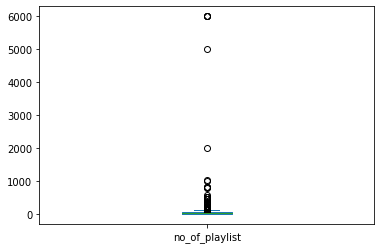

In [34]:
youtube.no_of_playlist.plot(kind = 'box')

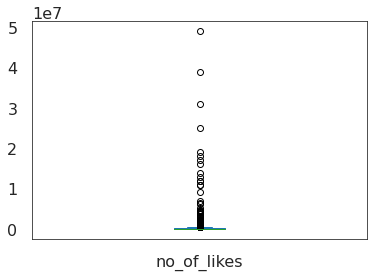

In [128]:
youtube.no_of_likes.plot(kind = 'box')

In [129]:
#Replacing with Median values as there are so many outliers
youtube['no_of_likes'].fillna(int(youtube['no_of_likes'].median()),inplace = True)
youtube['no_of_playlist'].fillna(int(youtube['no_of_playlist'].median()),inplace = True)

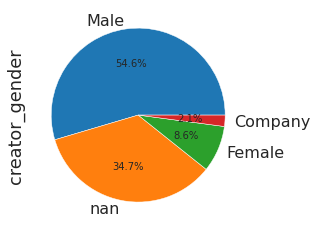

In [130]:
youtube.creator_gender.value_counts(dropna = False).plot(kind = 'pie',autopct='%1.1f%%')

Hampir 35% nilai di kolom creator_gender tidak ada. Mari kita periksa mereka dan temukan apa yang terjadi dan lihat apakah kita dapat menggantinya dengan jenis kelamin yang sesuai atau membiarkannya tanpa perubahan apa pun karena menggantinya dengan mode Male sangat merusak data.

In [131]:
youtube[youtube.creator_gender == 'Company'].creator_name.unique()

array(['Mr Beast', 'Data Is Wonderful', 'Battlegrounds Mobile',
       'Beyounick', 'Nat Geo Wild', '365 Data Science', 'Motiversity',
       'Athleanx', 'Spinninrecords', 'Be Inspired Channel',
       'Business Insider', 'The Prime Thanatos', 'Dude Perfect',
       'All Chill Nation', 'Cartooning Club How to Draw',
       'Drawing 4 Kids How to Draw', 'Clash Of Clans',
       'Applied AI Course'], dtype=object)

In [132]:
youtube[youtube.creator_gender.isnull()].creator_name.unique()[:25]

array(['TRT', 'Vogue', 'PUBG: BATTLEGROUNDS', 'Wildgamersk',
       'Codename RedDragon', 'Prime', '100 Years Of Health', 'CNET',
       'Videotragic', 'Pokémon Asia Officia', 'Other Level\x92S',
       'Disney', 'McLaren Automotive', 'touropia', 'GP Culture', 'IGN',
       'Branch Education', 'Simplilearn', 'Medcircle', 'DJI', 'WIRED',
       'Armadas', 'Motivation Mentors', 'CNBC Make I',
       'Official Triumph Motorcycles'], dtype=object)

Kita dapat melihat bahwa saluran ini diselenggarakan oleh Saluran Berita, Lembaga Pendidikan, Olahraga, Musik, Film, dll. Industri. Artinya, mereka bukan individu. Jadi kami akan menetapkan Perusahaan gender ke nilai nol ini di kolom creator_gender.

In [133]:
youtube.loc[youtube.creator_gender.isnull(),'creator_gender'] = 'Company'

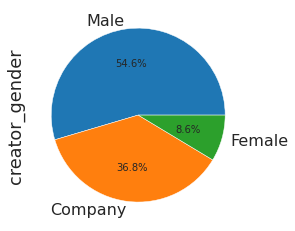

In [134]:
youtube.creator_gender.value_counts(dropna = False).plot(kind = 'pie', autopct = '%1.1f%%')

In [135]:
youtube.subtitle.value_counts(dropna = False)

Yes    460
No     380
yes     64
NaN      1
Name: subtitle, dtype: int64

Kolom subtitle ada 2 ya yang berbeda karena kesalahan format. Mari kita ubah ya yang berbeda menjadi satu format dan isi nilai NaN dengan mode.

In [47]:
youtube['subtitle'] = youtube['subtitle'].map({'Yes':'yes','No':'no','yes':'yes'})

In [136]:
#Replacing NaN with mode of the Categorical Variable
youtube['subtitle'].fillna(youtube['subtitle'].mode()[0],inplace = True) 
youtube.date_of_the_last_comment.fillna(youtube.date_of_the_last_comment.mode()[0],inplace = True)

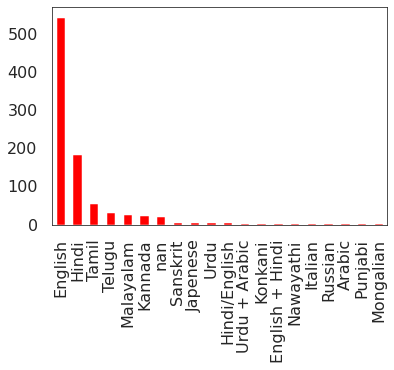

In [137]:
youtube.language_of_the_video.value_counts(dropna = False).plot(kind = 'bar', color = 'red')

Kami akan menghapus baris dengan nilai NaN di kolom language_of_the_video karena kolom tersebut memiliki banyak variabel kategori dan mungkin akan mengubah data jika kami menetapkan mode untuk itu. Ini kurang dari 2,5 persen dari dataset. Kami mungkin tidak kehilangan banyak informasi dengan perubahan ini.

In [138]:
youtube.dropna(subset = ['language_of_the_video','creator_name'], inplace = True)

In [139]:
youtube.isna().sum()

video_link                               0
video_views                              0
video_title                              0
channel_url                              0
creator_name                             0
creator_gender                           0
total_channel_subcribers                 0
total_channel_views                      0
duration_of_video                        0
duration_in_seconds                      0
date_of_video_upload                     0
no_of_likes                              0
language_of_the_video                    0
subtitle                                 0
video_description                        0
hashtags                                 0
no_of_comments                           0
date_of_the_last_comment                 0
maximum_quality_of_the_video             0
no_of_videos_the_channel                 0
no_of_playlist                           0
premiered_or_not                         0
community_engagement_(posts_per_week)    0
intern_who_

Jadi sekarang tidak ada nilai nol di dataset kita dan mari kita lihat kolom kategori tanggal dan waktu dan lihat perubahan apa yang bisa kita buat.

In [140]:
youtube[['duration_of_video','date_of_video_upload','date_of_the_last_comment']].head()

,duration_of_video,date_of_video_upload,date_of_the_last_comment
0,00:30:41,7/29/2022,8/6/2022
1,00:14:24,5/22/2022,6/15/2022
2,0:08:12,2/9/2021,9/23/2022
3,0:01:06,9/13/2022,9/22/2022
4,0:07:40,3/21/2017,9/23/2022


In [141]:
youtube['date_of_video_upload'] = pd.to_datetime(youtube['date_of_video_upload'])
youtube['date_of_the_last_comment'] = pd.to_datetime(youtube['date_of_video_upload'])

In [142]:
youtube['duration_of_video'] = pd.to_datetime(youtube['duration_of_video'])
youtube['duration_of_video'] = youtube['duration_of_video'].apply(lambda x:x.time())

In [143]:
youtube[['duration_of_video','duration_in_seconds','date_of_video_upload','date_of_the_last_comment']].dtypes

duration_of_video                   object
duration_in_seconds                  int64
date_of_video_upload        datetime64[ns]
date_of_the_last_comment    datetime64[ns]
dtype: object

In [144]:
youtube['duration_in_minutes'] = youtube.duration_of_video.apply(lambda x:(round(x.hour * 60 + x.minute + x.second/60)))

In [145]:
youtube['upload_year'] = youtube['date_of_video_upload'].apply(lambda x:x.strftime('%Y'))
youtube['upload_month'] = youtube['date_of_video_upload'].apply(lambda x:x.strftime('%B'))
youtube['upload_weekday'] = youtube['date_of_video_upload'].apply(lambda x:x.strftime('%A'))

In [146]:
youtube.head().iloc[:,-4:]

,duration_in_minutes,upload_year,upload_month,upload_weekday
0,31,2022,July,Friday
1,14,2022,May,Sunday
2,8,2021,February,Tuesday
3,1,2022,September,Tuesday
4,8,2017,March,Tuesday


(0.0, 100.0)

<Figure size 1440x576 with 0 Axes>

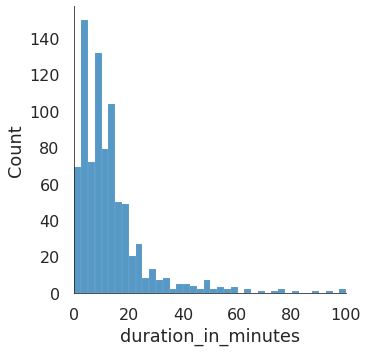

In [147]:
plt.figure(figsize = (20,8))
sns.displot(x = 'duration_in_minutes', data = youtube)
plt.xlim(0,100)

In [148]:
youtube.duration_in_minutes.describe()

count     873.000000
mean       33.026346
std       108.429142
min         0.000000
25%         5.000000
50%        11.000000
75%        17.000000
max      1045.000000
Name: duration_in_minutes, dtype: float64

Kami akan mengelompokkan kolom Duration_in_minutes ke dalam berbagai kategori video berdasarkan durasi waktu. Kami akan mengkategorikan video kurang dari 2 menit, 10 menit, 30 menit, 60 menit dan lebih dari 60 menit sebagai kategori Supershort, Short, Medium, Long dan SuperLong

In [150]:
youtube['length_category'] = pd.cut(youtube.duration_in_minutes, bins = [-1,2,10,30,60,1100], 
                                    labels = ['Supershort', 'Short', 'Medium','Long','SuperLong'])

In [151]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 904
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   video_link                             873 non-null    object        
 1   video_views                            873 non-null    int64         
 2   video_title                            873 non-null    object        
 3   channel_url                            873 non-null    object        
 4   creator_name                           873 non-null    object        
 5   creator_gender                         873 non-null    object        
 6   total_channel_subcribers               873 non-null    int64         
 7   total_channel_views                    873 non-null    int64         
 8   duration_of_video                      873 non-null    object        
 9   duration_in_seconds                    873 non-null    int64     

In [152]:
youtube.to_csv('youtube_cleaned.csv', index = False)

**Exploratory Data Analysis**

In [153]:
plt.style.use('seaborn-poster')
sns.set_style('white')

Top 10 channels subscriber wise

In [155]:
top10_channelsub = youtube[['creator_name','total_channel_subcribers', 'creator_gender']].groupby('creator_name').max().\
                        sort_values(by = 'total_channel_subcribers',ascending = False).head(10)
top10_channelsub.reset_index(drop = False, inplace = True)

In [156]:
gender_palette = {'Male': 'Blue', 'Female': 'Magenta', 'Company': 'Orange'}

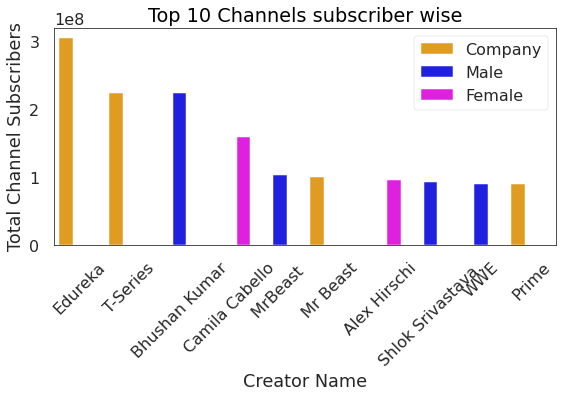

In [157]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'creator_name',y = 'total_channel_subcribers', hue = 'creator_gender', palette = gender_palette, data = top10_channelsub )
plt.xticks(rotation = 45)
plt.title('Top 10 Channels subscriber wise', color = 'black')
plt.xlabel('Creator Name')
plt.ylabel('Total Channel Subscribers')
plt.legend(loc = 1)
plt.show()

Sesuai dataset, kita dapat melihat bahwa lebih dari setengah dari 10 saluran teratas adalah oleh individu bukan perusahaan. Pria dan Perusahaan memiliki jumlah saluran yang sama di atas dan dua kali lipat dari saluran wanita.

Top 10 channels views wise

In [159]:
top_channelsview = youtube[['creator_name','total_channel_views', 'creator_gender']].groupby('creator_name').max()\
                                    .sort_values(by = 'total_channel_views', ascending = False).head(10)
top_channelsview.reset_index(drop = False, inplace = True)

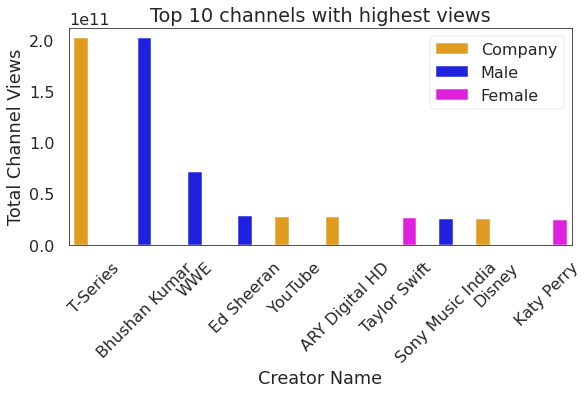

In [160]:
plt.figure(figsize = (9,4))
sns.barplot(x = 'creator_name', y = 'total_channel_views', hue 
            = 'creator_gender', data = top_channelsview, 
            palette = gender_palette )
plt.title('Top 10 channels with highest views')
plt.ylabel('Total Channel Views')
plt.xlabel('Creator Name')
plt.xticks(rotation = 45)
plt.legend(loc = 1)
plt.show()

Kami mengamati bahwa sebagian besar saluran milik industri musik. Tampaknya saluran musik mendapatkan jumlah penayangan tertinggi dari semua kategori.

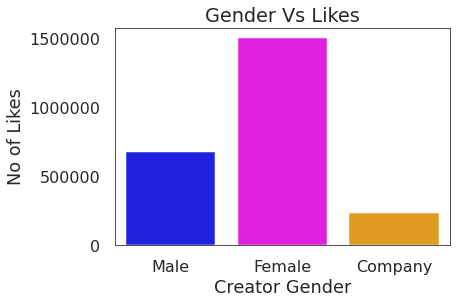

In [161]:
plt.figure(figsize=(6,4))
sns.barplot(x="creator_gender", y="no_of_likes", palette = gender_palette, data=youtube, ci = None)
plt.xlabel("Creator Gender")
plt.ylabel("No of Likes")
plt.title('Gender Vs Likes')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Video yang dibuat oleh jenis kelamin Wanita mengumpulkan lebih banyak suka daripada Pria dan Perusahaan dengan selisih yang sangat besar.

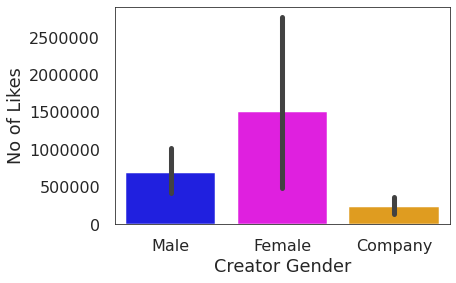

In [162]:
plt.figure(figsize=(6,4))
sns.barplot(x="creator_gender", y="no_of_likes", palette = gender_palette, data=youtube)
plt.xlabel("Creator Gender")
plt.ylabel("No of Likes")
plt.ticklabel_format(style='plain', axis='y')
plt.show()


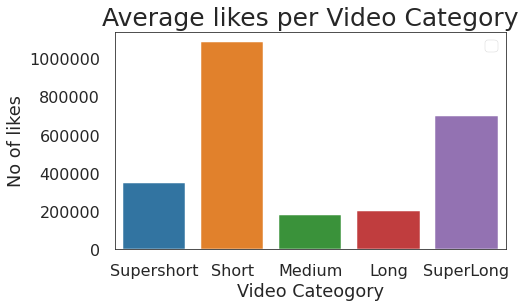

In [163]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'length_category', y = 'no_of_likes', data = youtube, ci = None )
plt.title('Average likes per Video Category', fontsize = 25)
plt.xlabel('Video Cateogory' )
plt.ylabel('No of likes')
plt.ticklabel_format(axis = 'y',style = 'plain' )
plt.legend()

Video berdurasi pendek antara 2 hingga 10 menit mendapatkan rata-rata suka terbanyak diikuti oleh video SuperLong berdurasi lebih dari satu jam.

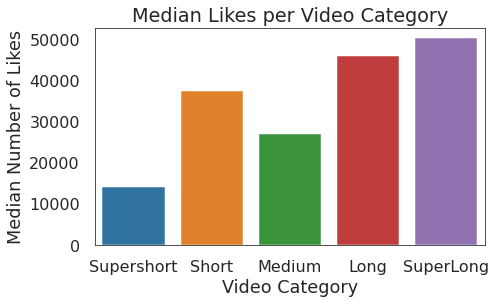

In [164]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'length_category', y = 'no_of_likes', data = youtube, estimator = np.median, ci = None)
plt.title('Median Likes per Video Category')
plt.xlabel('Video Category')
plt.ylabel('Median Number of Likes')
plt.show()

In [165]:
youtube.maximum_quality_of_the_video.unique()

array(['1080p', '720p', '2160p', '240p', '1440p', '480p', '360p'],
      dtype=object)

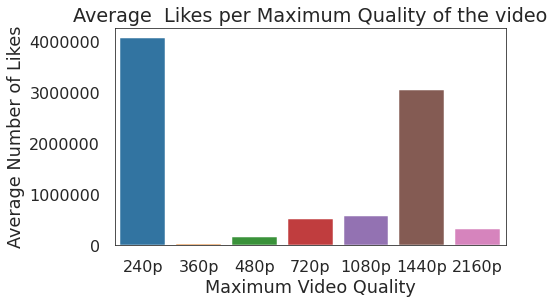

In [166]:
plt.figure(figsize = (7,4))
sns.barplot(x = 'maximum_quality_of_the_video', y = 'no_of_likes', order =['240p','360p','480p','720p','1080p', '1440p','2160p' ],
            data = youtube, ci = None)
plt.title('Average  Likes per Maximum Quality of the video')
plt.xlabel('Maximum Video Quality')
plt.ylabel('Average Number of Likes')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

Video dengan kualitas 240p rata-rata mendapatkan paling banyak suka tetapi ada 3 video dengan kualitas 240p yang begitu terkenal dan hasilnya miring. Tetapi tren umumnya adalah orang-orang menyukai video dengan kualitas terbaik.

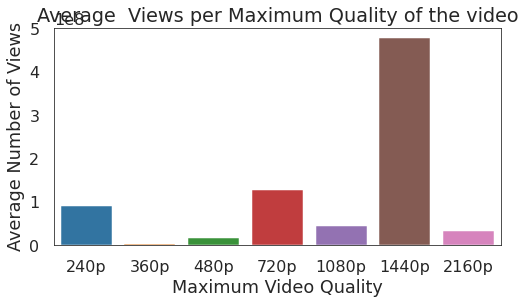

In [167]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'maximum_quality_of_the_video', y = 'video_views', order =['240p','360p','480p','720p','1080p', '1440p','2160p' ],
            data = youtube, ci = None)
plt.title('Average  Views per Maximum Quality of the video')
plt.xlabel('Maximum Video Quality')
plt.ylabel('Average Number of Views')
plt.show()

Video dengan kualitas 1440p rata-rata mendapatkan lebih banyak penayangan diikuti dengan kualitas 720p

In [168]:
year_order = np.sort(youtube.upload_year.unique())

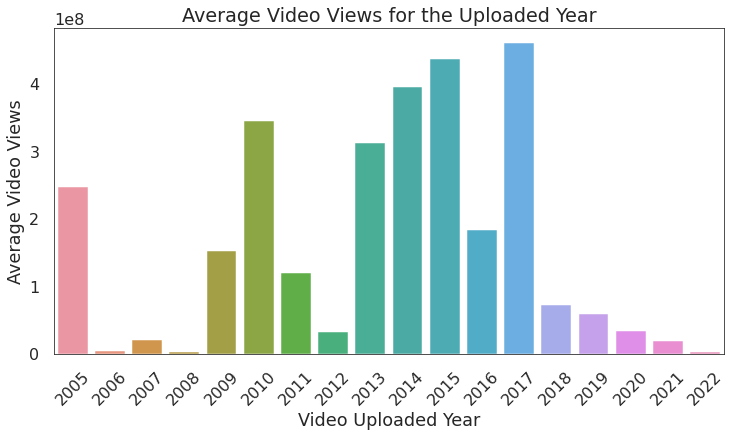

In [169]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'upload_year',y = 'video_views', data = youtube, order = year_order, ci = None)
plt.title('Average Video Views for the Uploaded Year')
plt.xlabel('Video Uploaded Year')
plt.ylabel('Average Video Views')
plt.xticks(rotation = 45)
plt.show()

Berlawanan dengan ekspektasi saya tentang rata-rata penayangan video yang meningkat setiap tahun, jumlah tersebut turun dari 5 tahun terakhir. Video yang diunggah pada tahun 2017,2015,2014,2013 mendapatkan lebih banyak penayangan secara rata-rata dibandingkan semua tahun.

In [170]:
month_order = ['January','February','March','April', 'May', 'June','July', 'August','September','October', 
               'November', 'December']

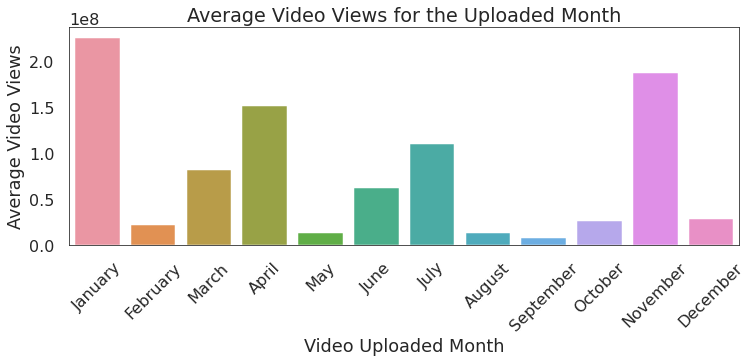

In [171]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'upload_month',y = 'video_views', data = youtube,order = month_order, ci = None)
plt.title('Average Video Views for the Uploaded Month')
plt.xlabel('Video Uploaded Month')
plt.ylabel('Average Video Views')
plt.xticks(rotation = 45)
plt.show()

Video yang diupload pada bulan Januari dan November rata-rata mendapatkan penayangan tertinggi.

In [172]:
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

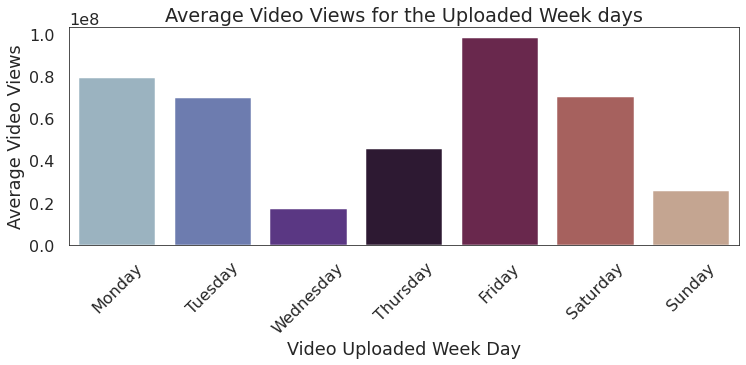

In [173]:
plt.figure(figsize = (12,4))
sns.barplot(x = 'upload_weekday',y = 'video_views', data = youtube,order = weekday_order, palette = 'twilight', ci = None)
plt.title('Average Video Views for the Uploaded Week days')
plt.xlabel('Video Uploaded Week Day')
plt.ylabel('Average Video Views')
plt.xticks(rotation = 45)
plt.show()

Video yang diunggah pada hari Jumat mendapatkan rata-rata penayangan terbanyak dan video yang diunggah pada hari Rabu mendapatkan paling sedikit.

**Kesimpulan**

1. Sesuai dataset, kita dapat melihat bahwalebih dari setengah dari 10 saluran teratas adalah oleh individu bukan perusahaan. Individu memberikan persaingan ketat kepada organisasi. Pria dan Perusahaan memiliki jumlah saluran yang sama di atas dan dua kali lipat dari saluran wanita.
2. Meskipun Wanita mendapatkan lebih sedikit penayangan untuk video mereka, mereka mendapatkan suka terbanyak untuk video yang mereka posting dibandingkan dengan Pria dan Perusahaan dengan selisih yang sangat besar.
3. Kami mengamati bahwa sebagian besar saluran milik industri musik. Tampaknya saluran musik mendapatkan jumlah penayangan tertinggi dari semua kategori.
4. Video berdurasi pendek antara 2 hingga 10 menit mendapatkan rata-rata suka terbanyak diikuti oleh video SuperLong berdurasi lebih dari satu jam.
5. Video dengan kualitas 1440p rata-rata mendapatkan lebih banyak penayangan diikuti dengan kualitas 720p.
6. Berlawanan dengan ekspektasi saya tentang rata-rata penayangan video yang meningkat setiap tahun, jumlah tersebut turun dari 5 tahun terakhir. Video yang diunggah pada tahun 2017,2015,2014,2013 mendapatkan lebih banyak penayangan secara rata-rata dibandingkan semua tahun.
7. Video yang diupload pada bulan Januari dan November rata-rata mendapatkan penayangan tertinggi.
8. Video yang diunggah pada hari Jumat mendapatkan rata-rata penayangan terbanyak dan video yang diunggah pada hari Rabu mendapatkan paling sedikit.